## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy import stats
plt.rcParams["figure.figsize"]= [12,5]

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



# Combine the data into a single dataset

# Display the data table for preview


In [3]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [4]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [5]:
# Combine the data into a single dataset
complete_mouse_data = pd.merge(mouse_metadata, study_results, how = 'inner', on =['Mouse ID','Mouse ID'])


In [6]:
# Display the data table for preview
complete_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice.
number_of_mice = complete_mouse_data['Mouse ID'].nunique()
number_of_mice

249

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

filter_data =complete_mouse_data.duplicated(['Mouse ID', 'Timepoint'])
filter_data

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 

reset_index_df= complete_mouse_data[filter_data].reset_index(drop=True)
reset_index_df 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,g989,Propriva,Female,21,26,0,45.000000,0
1,g989,Propriva,Female,21,26,5,47.570392,0
2,g989,Propriva,Female,21,26,10,49.880528,0
3,g989,Propriva,Female,21,26,15,53.442020,0
4,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = complete_mouse_data.drop_duplicates(['Mouse ID', 'Timepoint'], ignore_index= True)
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2
1884,z969,Naftisol,Male,9,30,30,65.841013,3
1885,z969,Naftisol,Male,9,30,35,69.176246,4
1886,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# Checking the number of mice in the clean DataFrame.
no_of_mice = clean_df['Mouse ID'].nunique()
no_of_mice

249

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
grouped_df = clean_df.groupby('Drug Regimen')

mean = grouped_df['Tumor Volume (mm3)'].mean()
median = grouped_df['Tumor Volume (mm3)'].median()
variance = grouped_df['Tumor Volume (mm3)'].var()
standard_deviation = grouped_df['Tumor Volume (mm3)'].std()
SEM = grouped_df['Tumor Volume (mm3)'].sem()


df = pd.DataFrame({'Tumor Volume Mean': mean, 
                   'Tumor Volume Median': median,
                   'Tumor Volume Variance': variance,
                   'Tumor Volume Standard Deviation':standard_deviation,
                   'Tumor Volume Sem': SEM
                
})

df
#df1 = grouped_df['Tumor Volume (mm3)'].describe()

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
df1 = grouped_df['Tumor Volume (mm3)'].agg([np.mean, np.median, np.var, np.std, st.sem ])

df1 = pd.DataFrame({'Tumor Volume Mean': mean, 
                   'Tumor Volume Median': median,
                   'Tumor Volume Variance': variance,
                   'Tumor Volume Standard Deviation':standard_deviation,
                   'Tumor Volume Sem': SEM
                
})
df1

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [14]:

mice_df = clean_df.groupby('Drug Regimen', as_index=False)["Timepoint"].count()
mice_df

,Drug Regimen,Timepoint
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,156
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


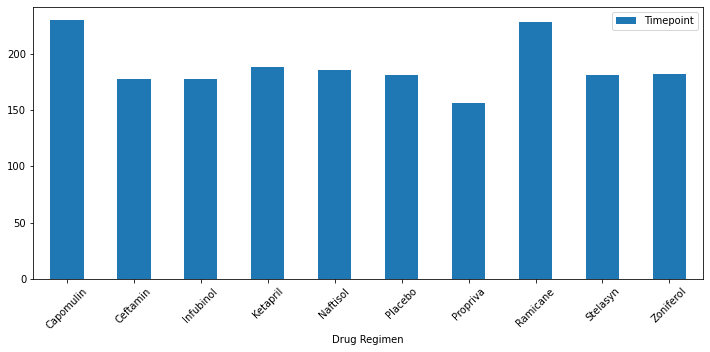

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_df.plot(kind="bar", x="Drug Regimen", y="Timepoint", rot=45)
plt.show()



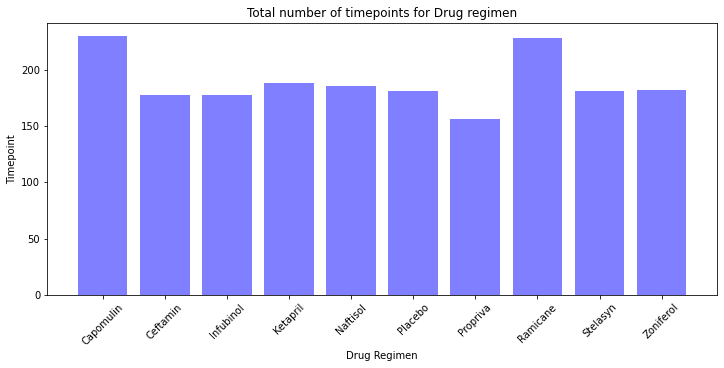

In [16]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

plt.bar(mice_df['Drug Regimen'], mice_df["Timepoint"], color='b', alpha=0.5, align="center")
plt.xticks( mice_df['Drug Regimen'], rotation=45)
plt.title('Total number of timepoints for Drug regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Timepoint')

plt.show()

In [17]:
gender_df = clean_df.groupby('Sex')
gender_df = gender_df['Sex'].count()
gender_df

Sex
Female    930
Male      958
Name: Sex, dtype: int64

<AxesSubplot:ylabel='Sex'>

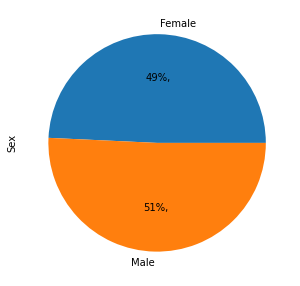

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df.plot(kind='pie', autopct='%1.0f%%,')

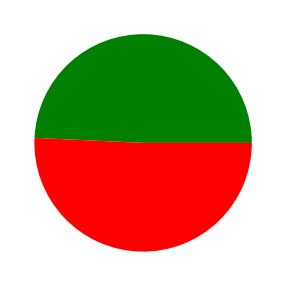

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie( gender_df, colors=['green','red'])
plt.legend
plt.axis()
plt.show()

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimen_df = clean_df.loc[clean_df['Drug Regimen'].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
regimen_df = regimen_df.groupby(["Drug Regimen","Mouse ID"])

# Start by getting the last (greatest) timepoint for each mouse
regimen_df = regimen_df.max("Timepoint")
regimen_df.reset_index(inplace=True)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#reg_clean_df =  pd.merge(clean_df, regimen_df, how = 'inner', on =['Mouse ID','Mouse ID'])
merged_df= pd.merge(regimen_df, clean_df, on=("Mouse ID", "Timepoint"), how = 'left')
merged_df

,Drug Regimen_x,Mouse ID,Age_months_x,Weight (g)_x,Timepoint,Tumor Volume (mm3)_x,Metastatic Sites_x,Drug Regimen_y,Sex,Age_months_y,Weight (g)_y,Tumor Volume (mm3)_y,Metastatic Sites_y
0,Capomulin,b128,9,22,45,45.651331,2,Capomulin,Female,9,22,38.982878,2
1,Capomulin,b742,7,21,45,45.000000,0,Capomulin,Male,7,21,38.939633,0
2,Capomulin,f966,16,17,20,45.000000,0,Capomulin,Male,16,17,30.485985,0
3,Capomulin,g288,3,19,45,46.304003,1,Capomulin,Male,3,19,37.074024,1
4,Capomulin,g316,22,22,45,46.809225,2,Capomulin,Female,22,22,40.159220,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Ramicane,s508,1,17,45,45.000000,0,Ramicane,Male,1,17,30.276232,0
96,Ramicane,u196,18,25,45,47.622816,3,Ramicane,Male,18,25,40.667713,3
97,Ramicane,w678,5,24,5,45.000000,0,Ramicane,Female,5,24,43.166373,0
98,Ramicane,y449,19,24,15,46.378092,0,Ramicane,Male,19,24,44.183451,0


In [21]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_volume_data =[]

# Create empty list to fill with tumor vol data (for plotting)
for drug in treatments:
    # step 1 - perform filtering
    boolean_series_drug = regimen_df[regimen_df["Drug Regimen"]==drug]
    final_tumor_vol = boolean_series_drug['Tumor Volume (mm3)']
    tumor_volume_data.append(final_tumor_vol)
    #calculate iqr, lowerq, upperq, upper bound, lower bound and outliers

#Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = regimen_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq



print(f"The lower quartile of each treatment is: {lowerq}")
print(f"The upper quartile of each treatment is: {upperq}")
print(f"The interquartile range of each treatment is: {iqr}")
print(f"The the median of each treatment is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


 # Determine outliers using upper and lower bounds

outlier_df = regimen_df.loc[(regimen_df['Tumor Volume (mm3)'] < lower_bound) | (regimen_df['Tumor Volume (mm3)'] > upper_bound)]
outlier_df

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    

The lower quartile of each treatment is: 45.5098442875
The upper quartile of each treatment is: 59.930261755
The interquartile range of each treatment is: 14.420417467499995
The the median of each treatment is: 46.860058175 
Values below 23.87921808625001 could be outliers.
Values above 81.56088795624999 could be outliers.


,Drug Regimen,Mouse ID,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

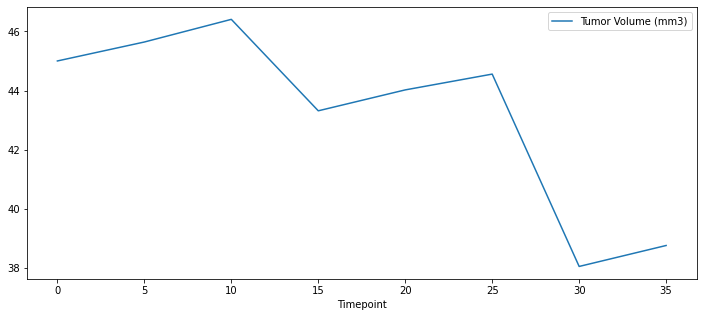

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = clean_df[clean_df['Drug Regimen']=='Capomulin']

# randomly select a mouse
single_mouse = capomulin.sample(1)["Mouse ID"].values[0]

# mouse data with that mouse ID
mouse_data = capomulin[capomulin["Mouse ID"]== single_mouse]


mouse_data.plot(y='Tumor Volume (mm3)', x='Timepoint')
plt.show()

In [23]:
capomulin

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1447,r157,Capomulin,Male,22,25,0,45.000000,0
1448,r157,Capomulin,Male,22,25,5,45.597064,0
1449,r157,Capomulin,Male,22,25,10,46.059608,0


In [24]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
tumor_weight= capomulin[['Weight (g)', 'Tumor Volume (mm3)']]
tumor_weight=tumor_weight.reset_index(drop=True)
tumor_volume=tumor_weight['Tumor Volume (mm3)'].mean()


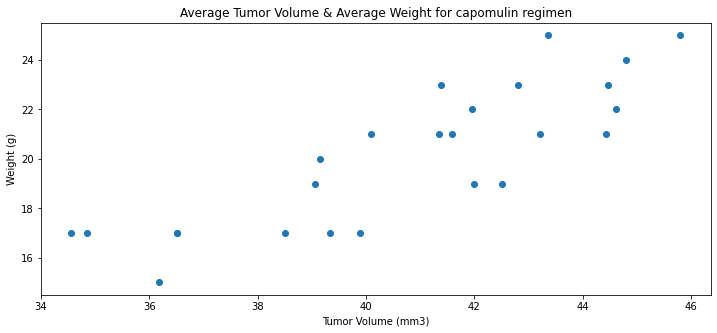

In [25]:
volume = capomulin.groupby(['Mouse ID']).mean()
plt.scatter(volume['Tumor Volume (mm3)'],volume['Weight (g)'] )
plt.title('Average Tumor Volume & Average Weight for capomulin regimen')
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.show()

## Correlation and Regression

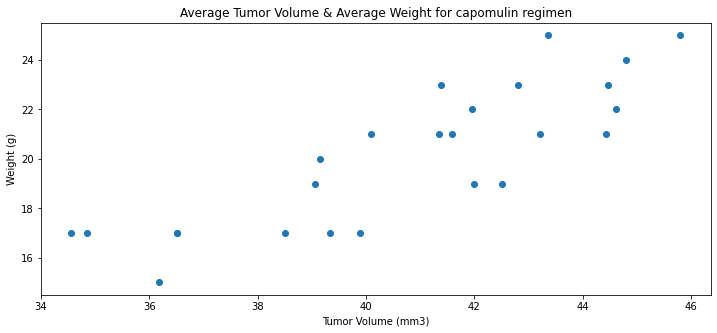

The correlation between both factors is 0.84


In [26]:
volume = capomulin.groupby(['Mouse ID']).mean()
tumor_volume = volume['Tumor Volume (mm3)']
weight = volume['Weight (g)']
plt.scatter(volume['Tumor Volume (mm3)'],volume['Weight (g)'] )
plt.title('Average Tumor Volume & Average Weight for capomulin regimen')
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.show()

correlation = st.pearsonr(weight,tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

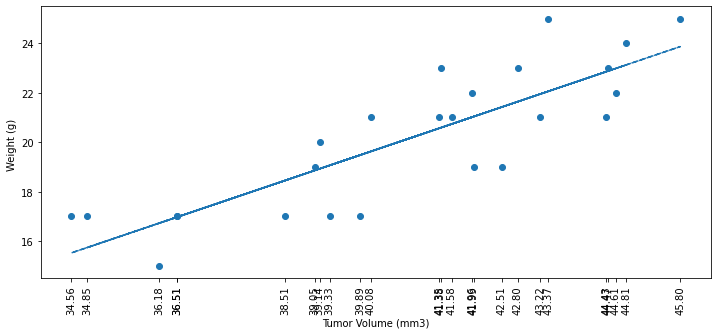

In [27]:
# linear regression model for mouse weight and tumor volume for the capomulin regime.
weight = volume['Weight (g)']
tumor_volume = volume['Tumor Volume (mm3)']

m_slope, m_int, m_r, m_p, m_std_err = stats.linregress(tumor_volume, weight)
m_fit = m_slope * tumor_volume + m_int
plt.scatter(volume['Tumor Volume (mm3)'],volume['Weight (g)'])
plt.plot(tumor_volume,m_fit,"--")
plt.xticks(tumor_volume, rotation=90)
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g) ')
plt.show()